In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 가져오기

## 포지션별 데이터

In [2]:
data_path = './League1_data/League1_Position_Player_Stats/'
path_list = os.listdir(data_path)
path_list.pop(2)
path_list

['L1_M_Player.csv',
 'L1_AM_Player.csv',
 'L1_DM_Player.csv',
 'L1_FW_Player.csv',
 'L1_GK_Player.csv',
 'L1_D_Player.csv']

In [3]:
L1_M_player_df = pd.read_csv(data_path+path_list[0])
L1_AM_player_df = pd.read_csv(data_path+path_list[1])
L1_DM_player_df = pd.read_csv(data_path+path_list[2])
L1_FW_player_df = pd.read_csv(data_path+path_list[3])
L1_GK_player_df = pd.read_csv(data_path+path_list[4])
L1_D_player_df = pd.read_csv(data_path+path_list[5])

In [4]:
print(L1_GK_player_df.shape)
print(L1_M_player_df.shape)
print(L1_AM_player_df.shape)
print(L1_DM_player_df.shape)
print(L1_FW_player_df.shape)
print(L1_D_player_df.shape)

(20, 35)
(57, 35)
(62, 35)
(29, 35)
(20, 35)
(123, 35)


In [5]:
# col확인 -> Unnamed: 0 제거 필요
L1_AM_player_df.columns

Index(['Unnamed: 0', 'player_name', 'team_number', 'Team', 'age', 'position',
       'Apps', 'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB',
       'ThrB', 'Rating', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG'],
      dtype='object')

In [6]:
#  Unnamed: 0 제거
L1_GK_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_GK_player_df.shape

(20, 34)

In [7]:
#  Unnamed: 0 제거
L1_M_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_M_player_df.shape

(57, 34)

In [8]:
#  Unnamed: 0 제거
L1_AM_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_AM_player_df.shape

(62, 34)

In [9]:
#  Unnamed: 0 제거
L1_DM_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_DM_player_df.shape

(29, 34)

In [10]:
#  Unnamed: 0 제거
L1_FW_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_FW_player_df.shape

(20, 34)

In [11]:
#  Unnamed: 0 제거
L1_D_player_df.drop('Unnamed: 0', axis=1, inplace=True)
L1_D_player_df.shape

(123, 34)

# L1 팀 분석 데이터

In [12]:
L1_Team_df = pd.read_csv('./League1_data/League1_22_23_Team_Table_Added.csv')
L1_Team_df.columns

Index(['Unnamed: 0', 'Rank_x', 'Team', 'Goals', 'Shotspg', 'Yellow', 'Red',
       'Possession', 'Pass', 'AerialsWon', 'Rating', 'def_Shotspg',
       'def_Tacklespg', 'def_Interceptionspg', 'def_Foulspg', 'def_Offsidespg',
       'of_Shotspg', 'of_ShotsOTpg', 'of_Dribblespg', 'of_Fouledpg', 'xG',
       'xGDiff', 'Shots', 'xG_Shots', 'Rank_y', 'P', 'W', 'D', 'L', 'GF', 'GA',
       'GD', 'Pts'],
      dtype='object')

In [13]:
L1_Team_df.drop('Unnamed: 0', axis=1, inplace=True)

# GK 포지션 데이터
## GK포지션에서 승리에 가장 큰 영향을 주는 변수 추출
- 포지션의 특수성을 생각해서 필요없는 변수는 미리 제거

In [14]:
L1_GK_df = pd.merge(L1_GK_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [15]:
L1_GK_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [16]:
# 수치형 데이터만 뽑아온다.

L1_GK_numeric_df = L1_GK_df.select_dtypes(['int64', 'float64'])

In [17]:
L1_GK_corr_matrix = L1_GK_numeric_df.corr()
L1_GK_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.021390,0.191679,0.201402,-0.150672,0.006271,0.034215,-0.030228,NaN,0.182498,...,0.007180,-0.033264,-0.159824,-0.255779,NaN,1.833801e-01,-0.000126,NaN,NaN,-0.139850
age,0.021390,1.000000,-0.168229,-0.181238,0.130732,-0.024740,0.316339,-0.253431,NaN,0.556904,...,0.197920,-0.272141,-0.098960,0.283433,NaN,-1.313456e-01,0.558327,NaN,NaN,-0.157578
Apps,0.191679,-0.168229,1.000000,0.998845,0.052989,0.003558,0.000696,0.323264,NaN,-0.204874,...,0.252637,-0.298895,-0.067607,-0.004077,NaN,8.287637e-02,-0.339235,NaN,NaN,0.341110
Mins,0.201402,-0.181238,0.998845,1.000000,0.037073,0.015333,0.001780,0.320635,NaN,-0.198818,...,0.245528,-0.280603,-0.079671,-0.029412,NaN,8.441160e-02,-0.345840,NaN,NaN,0.338090
Assists,-0.150672,0.130732,0.052989,0.037073,1.000000,0.251630,0.274309,0.243441,NaN,-0.015049,...,0.022875,-0.205879,-0.205879,0.628971,NaN,-1.723755e-01,-0.073750,NaN,NaN,0.323276
KeyP,0.006271,-0.024740,0.003558,0.015333,0.251630,1.000000,0.605157,0.150785,NaN,0.241079,...,-0.190476,-0.190476,0.047619,-0.054554,NaN,-3.996041e-01,0.065795,NaN,NaN,0.453770
AvgP,0.034215,0.316339,0.000696,0.001780,0.274309,0.605157,1.000000,0.159944,NaN,0.589751,...,0.211029,-0.313440,0.080688,0.248875,NaN,-3.401470e-01,0.483106,NaN,NaN,0.301362
PS%,-0.030228,-0.253431,0.323264,0.320635,0.243441,0.150785,0.159944,1.000000,NaN,-0.362145,...,0.083942,-0.289134,-0.111923,0.115758,NaN,-5.148685e-01,-0.190441,NaN,NaN,0.801292
Crosses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongB,0.182498,0.556904,-0.204874,-0.198818,-0.015049,0.241079,0.589751,-0.362145,NaN,1.000000,...,0.227459,-0.208390,-0.222010,-0.159161,NaN,-1.464869e-01,0.546382,NaN,NaN,-0.183129


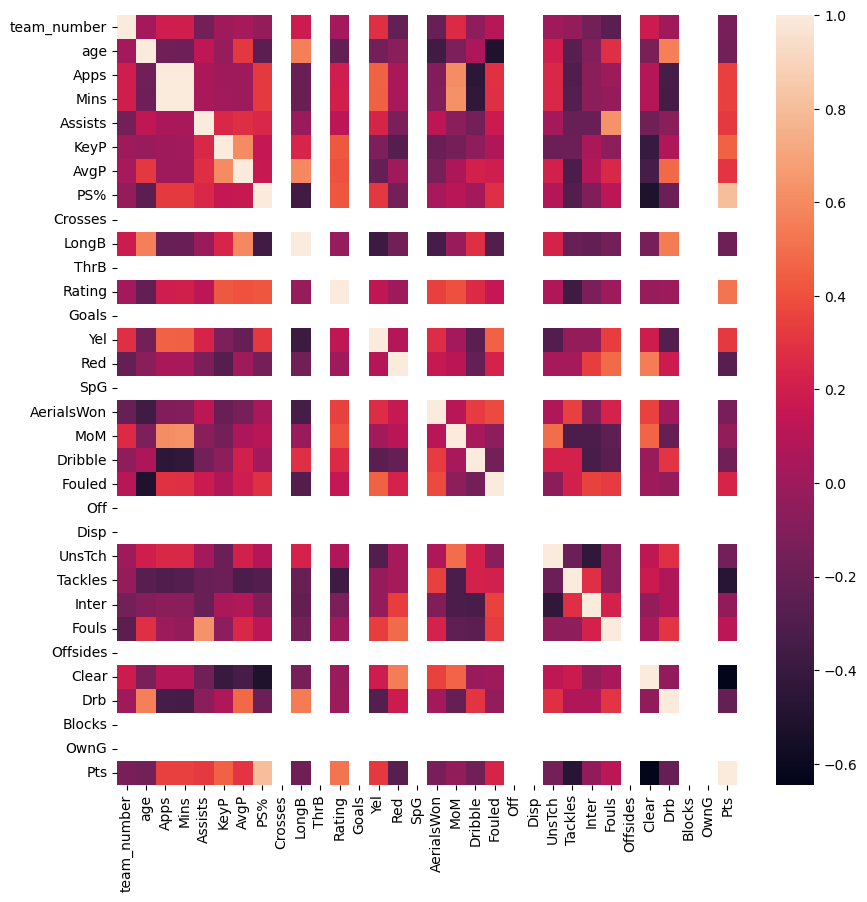

In [18]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_GK_corr_matrix)
plt.show()

In [19]:
# 결과가 nan인 변수 제거

L1_GK_df.drop(['Crosses', 'ThrB', 'Goals', 'SpG', 'Off', 'Disp', 'Offsides', 'Blocks', 'OwnG'], axis=1, inplace=True)

In [20]:
# 수치형 데이터만 뽑아온다.

L1_GK_numeric_df = L1_GK_df.select_dtypes(['int64', 'float64'])

In [21]:
L1_GK_corr_matrix = L1_GK_numeric_df.corr()
L1_GK_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,LongB,Rating,...,MoM,Dribble,Fouled,UnsTch,Tackles,Inter,Fouls,Clear,Drb,Pts
team_number,1.000000,0.021390,0.191679,0.201402,-0.150672,0.006271,0.034215,-0.030228,0.182498,0.026249,...,0.256471,-0.048574,9.903111e-02,0.007180,-0.033264,-0.159824,-0.255779,1.833801e-01,-0.000126,-0.139850
age,0.021390,1.000000,-0.168229,-0.181238,0.130732,-0.024740,0.316339,-0.253431,0.556904,-0.226819,...,-0.121604,0.056687,-5.102998e-01,0.197920,-0.272141,-0.098960,0.283433,-1.313456e-01,0.558327,-0.157578
Apps,0.191679,-0.168229,1.000000,0.998845,0.052989,0.003558,0.000696,0.323264,-0.204874,0.192146,...,0.609735,-0.452492,2.925143e-01,0.252637,-0.298895,-0.067607,-0.004077,8.287637e-02,-0.339235,0.341110
Mins,0.201402,-0.181238,0.998845,1.000000,0.037073,0.015333,0.001780,0.320635,-0.198818,0.207441,...,0.621866,-0.430803,2.825997e-01,0.245528,-0.280603,-0.079671,-0.029412,8.441160e-02,-0.345840,0.338090
Assists,-0.150672,0.130732,0.052989,0.037073,1.000000,0.251630,0.274309,0.243441,-0.015049,0.117954,...,-0.073667,-0.157243,1.709564e-01,0.022875,-0.205879,-0.205879,0.628971,-1.723755e-01,-0.073750,0.323276
KeyP,0.006271,-0.024740,0.003558,0.015333,0.251630,1.000000,0.605157,0.150785,0.241079,0.423625,...,-0.153351,-0.054554,7.117483e-02,-0.190476,-0.190476,0.047619,-0.054554,-3.996041e-01,0.065795,0.453770
AvgP,0.034215,0.316339,0.000696,0.001780,0.274309,0.605157,1.000000,0.159944,0.589751,0.402267,...,0.055756,0.213321,1.948178e-01,0.211029,-0.313440,0.080688,0.248875,-3.401470e-01,0.483106,0.301362
PS%,-0.030228,-0.253431,0.323264,0.320635,0.243441,0.150785,0.159944,1.000000,-0.362145,0.421244,...,0.101174,0.023152,2.862484e-01,0.083942,-0.289134,-0.111923,0.115758,-5.148685e-01,-0.190441,0.801292
LongB,0.182498,0.556904,-0.204874,-0.198818,-0.015049,0.241079,0.589751,-0.362145,1.000000,-0.027089,...,-0.012235,0.285553,-2.870455e-01,0.227459,-0.208390,-0.222010,-0.159161,-1.464869e-01,0.546382,-0.183129
Rating,0.026249,-0.226819,0.192146,0.207441,0.117954,0.423625,0.402267,0.421244,-0.027089,1.000000,...,0.399252,0.259663,1.459943e-01,0.062060,-0.369660,-0.132214,0.006182,-2.033234e-02,-0.003728,0.521357


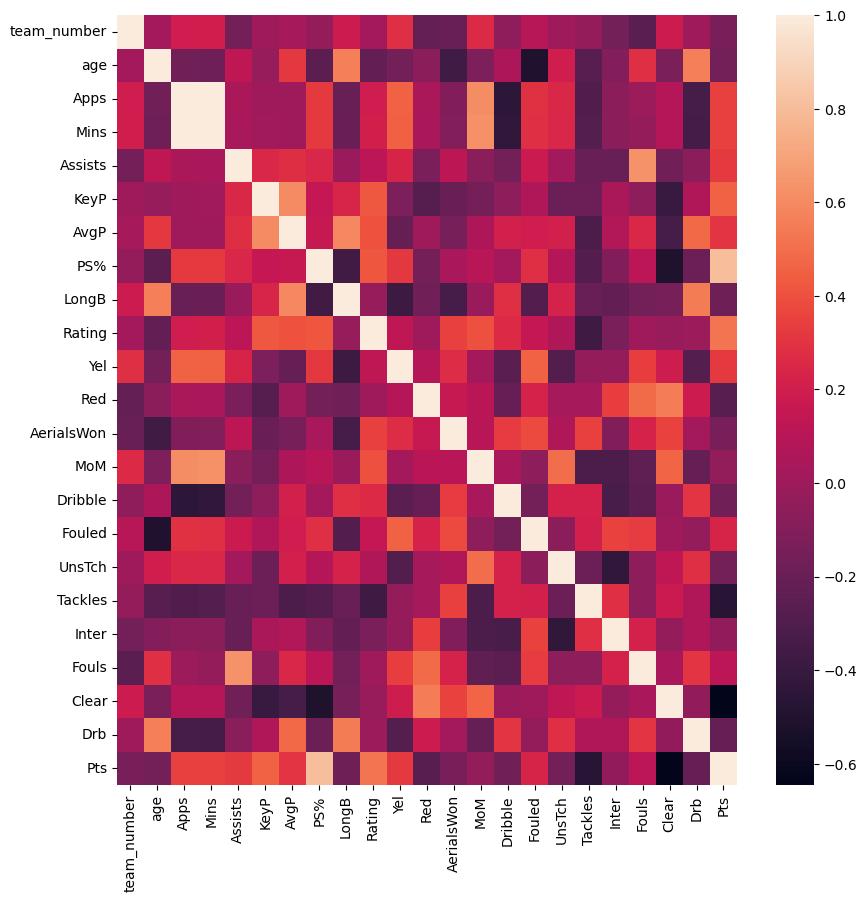

In [22]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_GK_corr_matrix)
plt.show()

In [23]:
# Pts부분만 뽑아서 상관관계 확인

L1_GK_corr_matrix_Pts = L1_GK_corr_matrix[['Pts']]
L1_GK_corr_matrix_Pts

,Pts
team_number,-0.139850
age,-0.157578
Apps,0.341110
Mins,0.338090
Assists,0.323276
KeyP,0.453770
AvgP,0.301362
PS%,0.801292
LongB,-0.183129
Rating,0.521357


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/827887596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


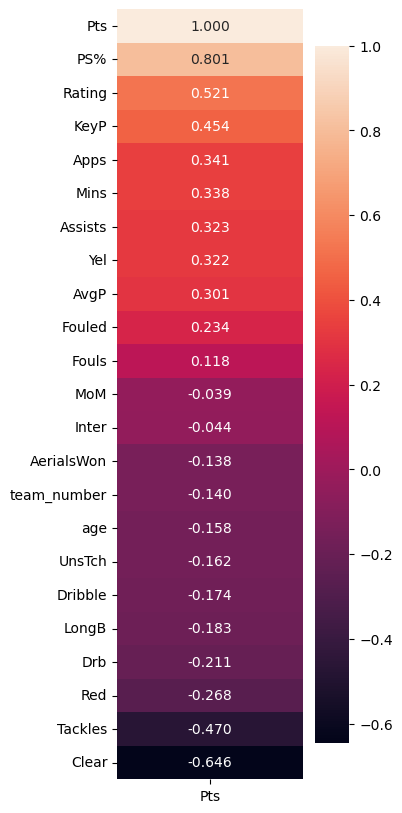

In [24]:
# 내림차순 정렬 후 heatmap으로 시각화

L1_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_GK_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [25]:
# 상위 10개 변수 추출

L1_GK_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['PS%', 'Rating', 'KeyP', 'Mins', 'Assists', 'Yel', 'AvgP', 'Fouled', 'Fouls', 'MoM']

['PS%',
 'Rating',
 'KeyP',
 'Apps',
 'Mins',
 'Assists',
 'Yel',
 'AvgP',
 'Fouled',
 'Fouls']

In [77]:
index_li = L1_GK_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_GK_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# PS%: 0.801 Rating: 0.521 KeyP: 0.454 Apps: 0.341 Mins: 0.338 Assists: 0.323 Yel: 0.322 AvgP: 0.301 Fouled: 0.234 Fouls: 0.118

PS%: 0.801
Rating: 0.521
KeyP: 0.454
Apps: 0.341
Mins: 0.338
Assists: 0.323
Yel: 0.322
AvgP: 0.301
Fouled: 0.234
Fouls: 0.118


# FW 포지션 데이터
## FW포지션에서 승리에 가장 큰 영향을 주는 변수 추출

In [26]:
L1_FW_df = pd.merge(L1_FW_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [27]:
L1_FW_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [28]:
# 수치형 데이터만 뽑아온다.

L1_FW_numeric_df = L1_FW_df.select_dtypes(['int64', 'float64'])

In [29]:
L1_FW_corr_matrix = L1_FW_numeric_df.corr()
L1_FW_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.154445,-0.023808,0.227310,-0.044272,0.319407,0.340121,-0.498021,0.045771,1.767050e-01,...,0.450498,0.129329,-0.021413,0.423996,NaN,0.525058,0.223310,0.608575,NaN,-0.067300
age,0.154445,1.000000,0.237549,0.033423,-0.335352,-0.098045,0.110684,-0.061817,0.214977,-1.044751e-01,...,-0.234585,-0.012245,0.015043,-0.039487,NaN,0.096507,0.032444,-0.060671,NaN,-0.192595
Apps,-0.023808,0.237549,1.000000,0.766972,0.397532,0.367699,0.154281,-0.159313,0.284901,3.439269e-01,...,0.102084,0.033459,0.104578,0.230417,NaN,0.382615,0.171814,-0.464837,NaN,0.151160
Mins,0.227310,0.033423,0.766972,1.000000,0.297704,0.699855,0.536327,-0.157763,0.479420,4.555590e-01,...,0.542594,0.281979,0.259525,0.553264,NaN,0.487820,0.498896,-0.132383,NaN,0.057685
Assists,-0.044272,-0.335352,0.397532,0.297704,1.000000,0.162021,-0.043063,0.285584,0.082217,3.596014e-01,...,0.029496,-0.104273,0.148993,-0.084386,NaN,-0.017795,-0.083753,-0.260598,NaN,0.644154
KeyP,0.319407,-0.098045,0.367699,0.699855,0.162021,1.000000,0.680391,-0.082261,0.573891,4.958232e-01,...,0.478939,0.266957,0.135772,0.225691,NaN,0.122373,0.498009,0.004764,NaN,0.223329
AvgP,0.340121,0.110684,0.154281,0.536327,-0.043063,0.680391,1.000000,0.147178,0.240935,5.725034e-01,...,0.528164,0.764051,0.484358,0.397283,NaN,0.175938,0.618023,0.207099,NaN,0.055147
PS%,-0.498021,-0.061817,-0.159313,-0.157763,0.285584,-0.082261,0.147178,1.000000,0.172173,1.043056e-01,...,-0.150698,0.078121,0.230042,-0.471948,NaN,-0.645567,0.030721,-0.288324,NaN,0.256410
Crosses,0.045771,0.214977,0.284901,0.479420,0.082217,0.573891,0.240935,0.172173,1.000000,1.491080e-01,...,0.367165,-0.133455,0.147220,-0.066472,NaN,-0.220376,0.277825,-0.142620,NaN,-0.115560
LongB,0.176705,-0.104475,0.343927,0.455559,0.359601,0.495823,0.572503,0.104306,0.149108,1.000000e+00,...,0.442657,0.403038,0.321958,0.366581,NaN,0.180729,0.263285,-0.133670,NaN,0.272864


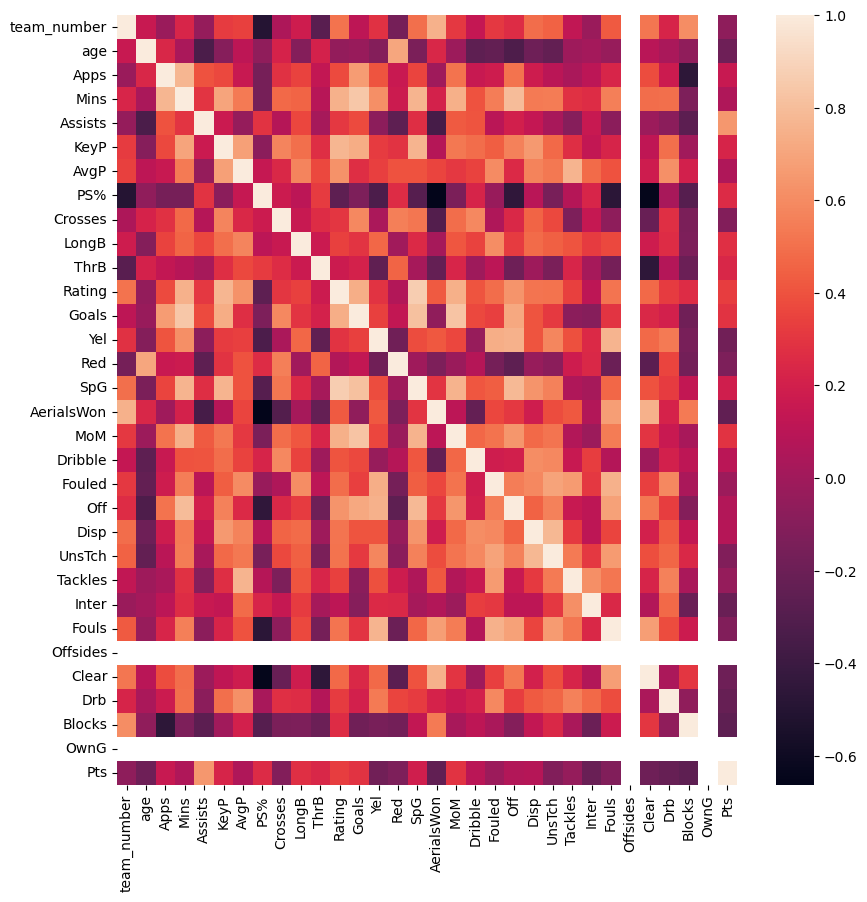

In [30]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_FW_corr_matrix)
plt.show()

In [31]:
# 결과가 nan인 변수 제거

L1_FW_df.drop(['Offsides', 'OwnG'], axis=1, inplace=True)

In [32]:
# 수치형 데이터만 뽑아온다.

L1_FW_numeric_df = L1_FW_df.select_dtypes(['int64', 'float64'])

In [33]:
L1_FW_corr_matrix = L1_FW_numeric_df.corr()
L1_FW_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,Off,Disp,UnsTch,Tackles,Inter,Fouls,Clear,Drb,Blocks,Pts
team_number,1.000000,0.154445,-0.023808,0.227310,-0.044272,0.319407,0.340121,-0.498021,0.045771,1.767050e-01,...,0.263437,0.489888,0.450498,0.129329,-0.021413,0.423996,0.525058,0.223310,0.608575,-0.067300
age,0.154445,1.000000,0.237549,0.033423,-0.335352,-0.098045,0.110684,-0.061817,0.214977,-1.044751e-01,...,-0.324328,-0.189755,-0.234585,-0.012245,0.015043,-0.039487,0.096507,0.032444,-0.060671,-0.192595
Apps,-0.023808,0.237549,1.000000,0.766972,0.397532,0.367699,0.154281,-0.159313,0.284901,3.439269e-01,...,0.508416,0.176437,0.102084,0.033459,0.104578,0.230417,0.382615,0.171814,-0.464837,0.151160
Mins,0.227310,0.033423,0.766972,1.000000,0.297704,0.699855,0.536327,-0.157763,0.479420,4.555590e-01,...,0.792653,0.537187,0.542594,0.281979,0.259525,0.553264,0.487820,0.498896,-0.132383,0.057685
Assists,-0.044272,-0.335352,0.397532,0.297704,1.000000,0.162021,-0.043063,0.285584,0.082217,3.596014e-01,...,0.195548,0.138936,0.029496,-0.104273,0.148993,-0.084386,-0.017795,-0.083753,-0.260598,0.644154
KeyP,0.319407,-0.098045,0.367699,0.699855,0.162021,1.000000,0.680391,-0.082261,0.573891,4.958232e-01,...,0.560027,0.651995,0.478939,0.266957,0.135772,0.225691,0.122373,0.498009,0.004764,0.223329
AvgP,0.340121,0.110684,0.154281,0.536327,-0.043063,0.680391,1.000000,0.147178,0.240935,5.725034e-01,...,0.247762,0.565619,0.528164,0.764051,0.484358,0.397283,0.175938,0.618023,0.207099,0.055147
PS%,-0.498021,-0.061817,-0.159313,-0.157763,0.285584,-0.082261,0.147178,1.000000,0.172173,1.043056e-01,...,-0.450647,0.090783,-0.150698,0.078121,0.230042,-0.471948,-0.645567,0.030721,-0.288324,0.256410
Crosses,0.045771,0.214977,0.284901,0.479420,0.082217,0.573891,0.240935,0.172173,1.000000,1.491080e-01,...,0.242464,0.458616,0.367165,-0.133455,0.147220,-0.066472,-0.220376,0.277825,-0.142620,-0.115560
LongB,0.176705,-0.104475,0.343927,0.455559,0.359601,0.495823,0.572503,0.104306,0.149108,1.000000e+00,...,0.321362,0.484186,0.442657,0.403038,0.321958,0.366581,0.180729,0.263285,-0.133670,0.272864


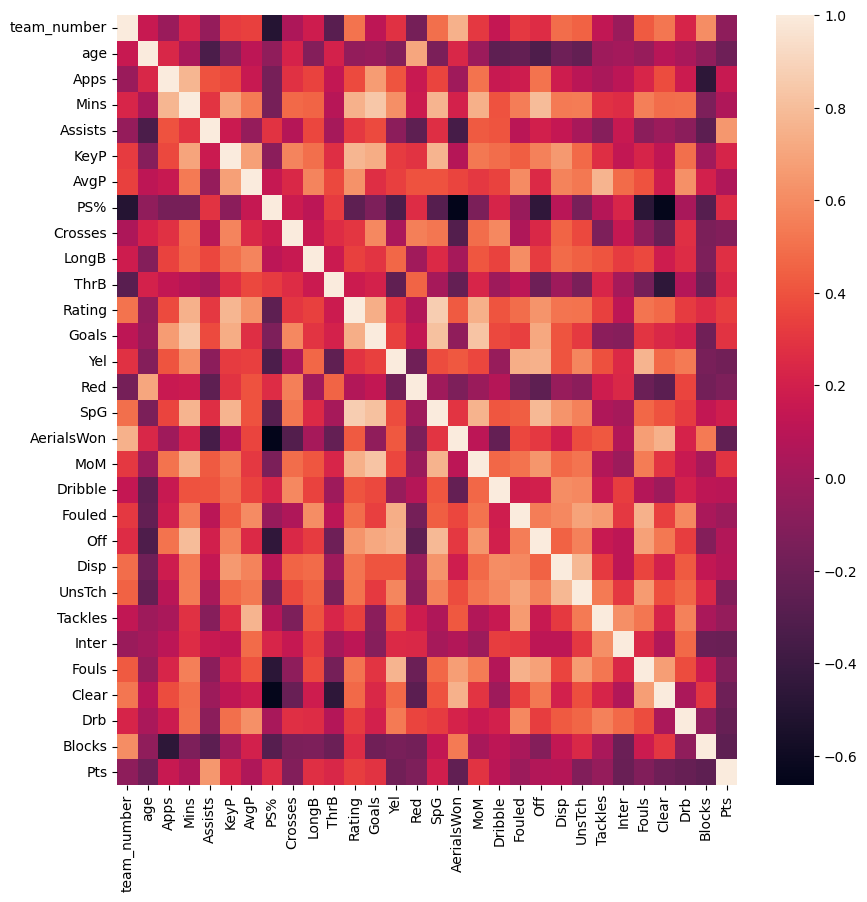

In [34]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_FW_corr_matrix)
plt.show()

In [35]:
# Pts부분만 뽑아서 상관관계 확인

L1_FW_corr_matrix_Pts = L1_FW_corr_matrix[['Pts']]
L1_FW_corr_matrix_Pts

,Pts
team_number,-0.067300
age,-0.192595
Apps,0.151160
Mins,0.057685
Assists,0.644154
KeyP,0.223329
AvgP,0.055147
PS%,0.256410
Crosses,-0.115560
LongB,0.272864


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/1278398350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_FW_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


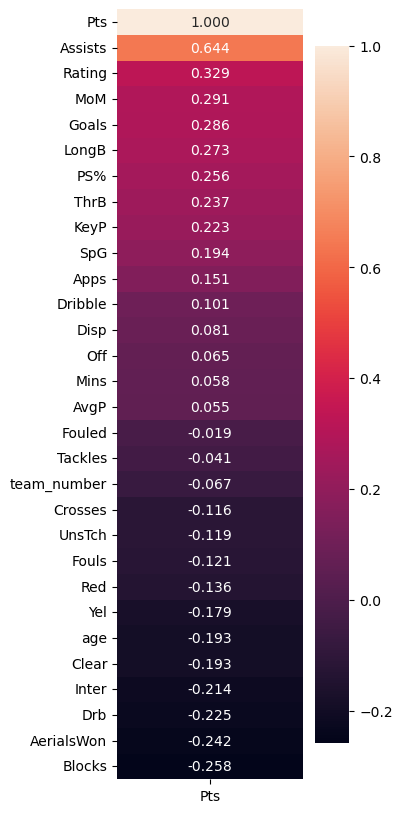

In [36]:
# 내림차순 정렬 후 heatmap으로 시각화

L1_FW_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_FW_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [37]:
# 상위 10개 변수 추출

L1_FW_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['Assists', 'Rating', 'MoM', 'Goals', 'LongB', 'PS%', 'ThrB', 'KeyP', 'SpG', 'Dribble']

['Assists',
 'Rating',
 'MoM',
 'Goals',
 'LongB',
 'PS%',
 'ThrB',
 'KeyP',
 'SpG',
 'Apps']

In [78]:
index_li = L1_FW_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_FW_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Assists: 0.644 Rating: 0.329 MoM: 0.291 Goals: 0.286 LongB: 0.273 PS%: 0.256 ThrB: 0.237 KeyP: 0.223 SpG: 0.194 Apps: 0.151

Assists: 0.644
Rating: 0.329
MoM: 0.291
Goals: 0.286
LongB: 0.273
PS%: 0.256
ThrB: 0.237
KeyP: 0.223
SpG: 0.194
Apps: 0.151


# AM 포지션 데이터
## AM포지션에서 승리에 가장 큰 영향을 주는 변수 추출

In [38]:
L1_AM_player_df.head()

,player_name,team_number,Team,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,Lionel Messi,304,Paris Saint-Germain,36,AM,32,2842,16,2.9,60.3,...,2.4,1.6,0.8,0.1,0.3,0.0,0.0,0.5,0.0,0
1,Kylian Mbappé,304,Paris Saint-Germain,24,AM,34,2822,5,1.6,37.9,...,1.2,1.9,0.3,0.1,0.6,0.0,0.1,0.3,0.0,0
2,Neymar,304,Paris Saint-Germain,31,AM,20,1553,11,2.5,59.4,...,1.9,2.5,1.1,0.2,1.3,0.0,0.1,0.5,0.1,0
3,Jonathan David,607,Lille,23,AM,37,3179,4,1.4,23.2,...,1.4,2.4,0.6,0.2,1.1,0.0,0.3,0.5,0.1,0
4,Amine Gouiri,313,Rennes,23,AM,33,2532,3,1.1,22.1,...,1.1,2.2,1.3,0.4,1.2,0.0,0.3,0.6,0.0,0


In [39]:
L1_AM_df = pd.merge(L1_AM_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [40]:
L1_AM_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [41]:
# 수치형 데이터만 뽑아온다.

L1_AM_numeric_df = L1_AM_df.select_dtypes(['int64', 'float64'])

In [42]:
L1_AM_corr_matrix = L1_AM_numeric_df.corr()
L1_AM_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.068271,0.006024,0.028383,0.041670,0.051118,-0.053841,-0.096928,0.262617,-0.081466,...,0.102890,0.121109,0.000630,-0.053137,-0.072873,0.037588,0.135265,0.066755,0.040802,-0.078887
age,0.068271,1.000000,-0.003935,0.182326,0.179538,0.271661,0.268639,-0.143335,0.195693,0.199739,...,0.140281,0.094835,-0.031115,0.035056,0.025678,0.029958,0.157291,0.215562,-0.099187,0.054706
Apps,0.006024,-0.003935,1.000000,0.745308,0.117272,-0.045947,-0.061642,-0.297224,-0.227056,-0.116486,...,0.263744,-0.058321,0.090785,0.186350,0.061216,0.251629,0.131308,0.011478,0.108364,-0.268563
Mins,0.028383,0.182326,0.745308,1.000000,0.415034,0.384851,0.383926,-0.149507,0.046325,0.136278,...,0.578801,0.098765,0.090301,0.300056,0.027705,0.191539,0.245632,0.186575,0.023120,-0.081676
Assists,0.041670,0.179538,0.117272,0.415034,1.000000,0.724583,0.684295,0.137980,0.414197,0.409873,...,0.221563,0.018589,-0.043414,0.017356,-0.052997,-0.282248,0.112681,-0.003091,-0.100617,0.414261
KeyP,0.051118,0.271661,-0.045947,0.384851,0.724583,1.000000,0.846126,0.344202,0.734354,0.647607,...,0.266561,0.129640,-0.051852,-0.035860,-0.009975,-0.410645,0.118043,0.030712,-0.108925,0.363198
AvgP,-0.053841,0.268639,-0.061642,0.383926,0.684295,0.846126,1.000000,0.485768,0.521278,0.739985,...,0.153795,0.289567,0.138774,0.067607,-0.087671,-0.261121,0.236038,0.073101,-0.128134,0.337329
PS%,-0.096928,-0.143335,-0.297224,-0.149507,0.137980,0.344202,0.485768,1.000000,0.273060,0.445881,...,-0.403302,0.090274,0.063446,-0.178100,-0.174909,-0.449859,0.121842,-0.103728,-0.043036,0.390038
Crosses,0.262617,0.195693,-0.227056,0.046325,0.414197,0.734354,0.521278,0.273060,1.000000,0.508530,...,0.004004,0.151608,-0.077058,-0.252503,-0.137948,-0.352156,0.118558,-0.091239,-0.101082,0.087964
LongB,-0.081466,0.199739,-0.116486,0.136278,0.409873,0.647607,0.739985,0.445881,0.508530,1.000000,...,-0.135067,0.346051,0.263426,-0.000645,-0.079430,-0.202533,0.217949,0.001895,-0.118359,0.052952


In [43]:
# 결과가 nan인 변수 제거

L1_AM_df.drop('OwnG', axis=1, inplace=True)

In [44]:
# 수치형 데이터만 뽑아온다.

L1_AM_numeric_df = L1_AM_df.select_dtypes(['int64', 'float64'])

In [45]:
L1_AM_corr_matrix = L1_AM_numeric_df.corr()
L1_AM_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,Pts
team_number,1.000000,0.068271,0.006024,0.028383,0.041670,0.051118,-0.053841,-0.096928,0.262617,-0.081466,...,0.076777,0.102890,0.121109,0.000630,-0.053137,-0.072873,0.037588,0.135265,0.066755,-0.078887
age,0.068271,1.000000,-0.003935,0.182326,0.179538,0.271661,0.268639,-0.143335,0.195693,0.199739,...,0.213593,0.140281,0.094835,-0.031115,0.035056,0.025678,0.029958,0.157291,0.215562,0.054706
Apps,0.006024,-0.003935,1.000000,0.745308,0.117272,-0.045947,-0.061642,-0.297224,-0.227056,-0.116486,...,0.077335,0.263744,-0.058321,0.090785,0.186350,0.061216,0.251629,0.131308,0.011478,-0.268563
Mins,0.028383,0.182326,0.745308,1.000000,0.415034,0.384851,0.383926,-0.149507,0.046325,0.136278,...,0.429724,0.578801,0.098765,0.090301,0.300056,0.027705,0.191539,0.245632,0.186575,-0.081676
Assists,0.041670,0.179538,0.117272,0.415034,1.000000,0.724583,0.684295,0.137980,0.414197,0.409873,...,0.474337,0.221563,0.018589,-0.043414,0.017356,-0.052997,-0.282248,0.112681,-0.003091,0.414261
KeyP,0.051118,0.271661,-0.045947,0.384851,0.724583,1.000000,0.846126,0.344202,0.734354,0.647607,...,0.604824,0.266561,0.129640,-0.051852,-0.035860,-0.009975,-0.410645,0.118043,0.030712,0.363198
AvgP,-0.053841,0.268639,-0.061642,0.383926,0.684295,0.846126,1.000000,0.485768,0.521278,0.739985,...,0.569562,0.153795,0.289567,0.138774,0.067607,-0.087671,-0.261121,0.236038,0.073101,0.337329
PS%,-0.096928,-0.143335,-0.297224,-0.149507,0.137980,0.344202,0.485768,1.000000,0.273060,0.445881,...,0.078082,-0.403302,0.090274,0.063446,-0.178100,-0.174909,-0.449859,0.121842,-0.103728,0.390038
Crosses,0.262617,0.195693,-0.227056,0.046325,0.414197,0.734354,0.521278,0.273060,1.000000,0.508530,...,0.368284,0.004004,0.151608,-0.077058,-0.252503,-0.137948,-0.352156,0.118558,-0.091239,0.087964
LongB,-0.081466,0.199739,-0.116486,0.136278,0.409873,0.647607,0.739985,0.445881,0.508530,1.000000,...,0.275608,-0.135067,0.346051,0.263426,-0.000645,-0.079430,-0.202533,0.217949,0.001895,0.052952


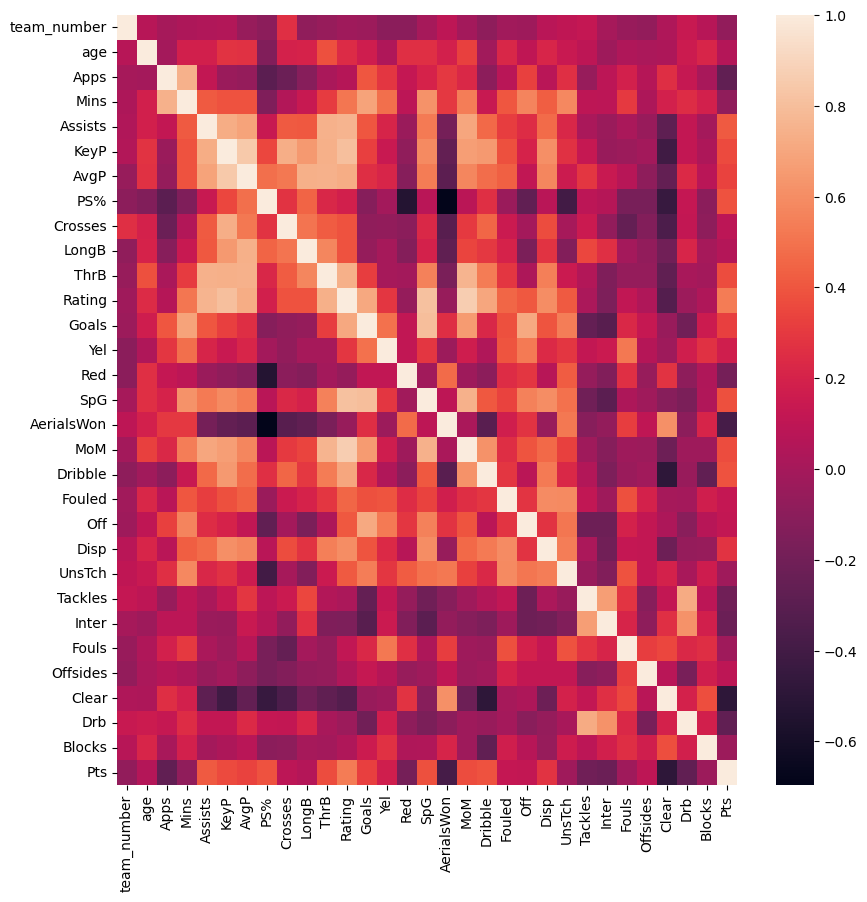

In [46]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_AM_corr_matrix)
plt.show()

In [47]:
# Pts부분만 뽑아서 상관관계 확인

L1_AM_corr_matrix_Pts = L1_AM_corr_matrix[['Pts']]
L1_AM_corr_matrix_Pts

,Pts
team_number,-0.078887
age,0.054706
Apps,-0.268563
Mins,-0.081676
Assists,0.414261
KeyP,0.363198
AvgP,0.337329
PS%,0.390038
Crosses,0.087964
LongB,0.052952


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/2085341670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_AM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


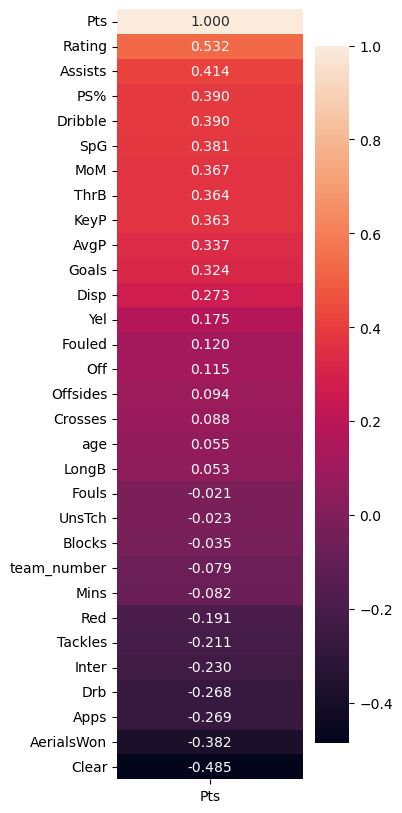

In [48]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

L1_AM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_AM_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [49]:
# 상위 10개 변수 추출

L1_AM_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['Rating', 'Assists', 'PS%', 'Dribble', 'SpG', 'MoM', 'ThrB', 'KeyP', 'AvgP', 'Goals']

['Rating',
 'Assists',
 'PS%',
 'Dribble',
 'SpG',
 'MoM',
 'ThrB',
 'KeyP',
 'AvgP',
 'Goals']

In [79]:
index_li = L1_AM_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_AM_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Rating: 0.532 Assists: 0.414 PS%: 0.390 Dribble: 0.390 SpG: 0.381 MoM: 0.367 ThrB: 0.364 KeyP: 0.363 AvgP: 0.337 Goals: 0.324

Rating: 0.532
Assists: 0.414
PS%: 0.390
Dribble: 0.390
SpG: 0.381
MoM: 0.367
ThrB: 0.364
KeyP: 0.363
AvgP: 0.337
Goals: 0.324


# M 포지션 데이터
## M포지션에서 승리에 가장 큰 영향을 주는 변수 추출

In [50]:
L1_M_player_df.head()

,player_name,team_number,Team,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,Alexandre Lacazette,228,Lyon,32,M,35,2938,5,1.4,24.9,...,1.3,1.9,1.2,0.4,1.8,0.0,0.1,0.5,0.1,0
1,Rémy Cabella,607,Lille,33,M,32,2535,10,3.2,49.1,...,1.1,1.5,2.0,0.5,0.8,0.0,0.2,1.1,0.2,0
2,Téji Savanier,311,Montpellier,31,M,30,2557,4,1.9,47.3,...,1.7,2.4,1.5,1.0,1.9,0.0,0.4,1.6,0.1,0
3,Enzo Le Fée,146,Lorient,23,M,35,3039,5,1.9,56.1,...,1.6,2.1,3.1,1.0,1.2,0.0,0.9,2.0,0.1,0
4,Benjamin Bourigeaud,313,Rennes,29,M,37,3084,10,2.6,46.6,...,0.5,0.9,1.2,0.8,0.9,0.1,0.7,1.2,0.1,0


In [51]:
L1_M_df = pd.merge(L1_M_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [52]:
L1_M_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [53]:
# 수치형 데이터만 뽑아온다.

L1_M_numeric_df = L1_M_df.select_dtypes(['int64', 'float64'])

In [54]:
L1_M_corr_matrix = L1_M_numeric_df.corr()
L1_M_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.017330,-0.084780,-0.004993,0.045109,0.055119,-0.111705,-0.254435,0.176145,0.058433,...,0.018024,0.112619,0.199127,0.011318,0.011286,0.151728,0.118114,0.176929,-0.100169,-0.247060
age,0.017330,1.000000,-0.175936,-0.070491,-0.080998,0.122043,-0.036755,-0.254978,0.113526,0.183300,...,-0.000079,-0.190926,-0.146685,0.005574,-0.132291,-0.020630,-0.132553,-0.061195,-0.063201,-0.259285
Apps,-0.084780,-0.175936,1.000000,0.863366,0.517724,0.387170,0.374580,0.143078,0.211779,0.280884,...,0.219082,0.301967,0.316624,0.242770,0.235911,0.185585,0.196269,0.207319,0.209781,0.169731
Mins,-0.004993,-0.070491,0.863366,1.000000,0.618858,0.514823,0.592469,0.186073,0.295960,0.489492,...,0.454698,0.530299,0.452861,0.481441,0.167046,0.384467,0.402134,0.300304,0.136339,0.108541
Assists,0.045109,-0.080998,0.517724,0.618858,1.000000,0.776942,0.231374,-0.065486,0.589092,0.172308,...,0.423085,0.220782,0.124047,0.251055,0.108907,0.107670,0.171154,0.114375,0.052259,0.238623
KeyP,0.055119,0.122043,0.387170,0.514823,0.776942,1.000000,0.243767,-0.169925,0.830153,0.142396,...,0.490168,0.222427,0.074452,0.230255,-0.015067,-0.045342,0.130537,-0.006437,-0.069672,0.103367
AvgP,-0.111705,-0.036755,0.374580,0.592469,0.231374,0.243767,1.000000,0.642514,0.010325,0.712745,...,0.008956,0.712042,0.547225,0.436050,0.178274,0.457028,0.605917,0.509823,0.151470,0.258636
PS%,-0.254435,-0.254978,0.143078,0.186073,-0.065486,-0.169925,0.642514,1.000000,-0.364458,0.303930,...,-0.286223,0.350294,0.193074,0.169336,0.186889,0.229496,0.209468,0.325491,0.183668,0.428046
Crosses,0.176145,0.113526,0.211779,0.295960,0.589092,0.830153,0.010325,-0.364458,1.000000,0.113835,...,0.432869,0.067430,0.114955,0.073988,0.080638,-0.083784,0.022429,-0.082987,-0.060007,-0.181349
LongB,0.058433,0.183300,0.280884,0.489492,0.172308,0.142396,0.712745,0.303930,0.113835,1.000000,...,0.002679,0.554440,0.637124,0.441062,0.169130,0.566074,0.562450,0.560564,0.182473,-0.106946


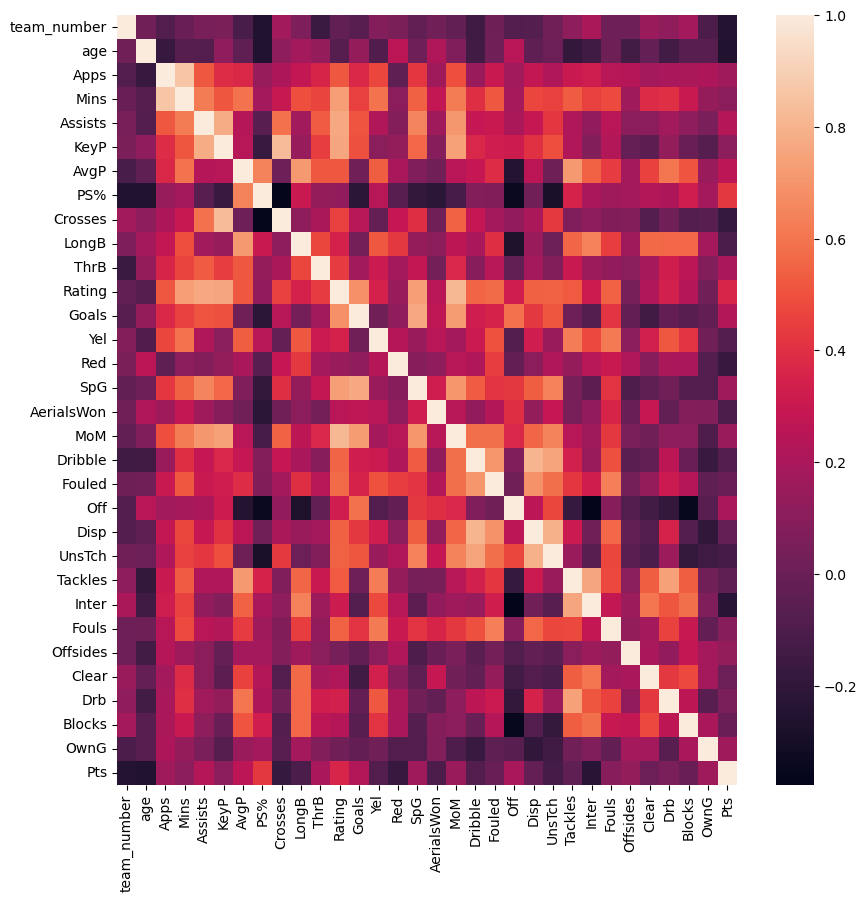

In [55]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_M_corr_matrix)
plt.show()

In [56]:
# Pts부분만 뽑아서 상관관계 확인

L1_M_corr_matrix_Pts = L1_M_corr_matrix[['Pts']]
L1_M_corr_matrix_Pts

,Pts
team_number,-0.247060
age,-0.259285
Apps,0.169731
Mins,0.108541
Assists,0.238623
KeyP,0.103367
AvgP,0.258636
PS%,0.428046
Crosses,-0.181349
LongB,-0.106946


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/2458765789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_M_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


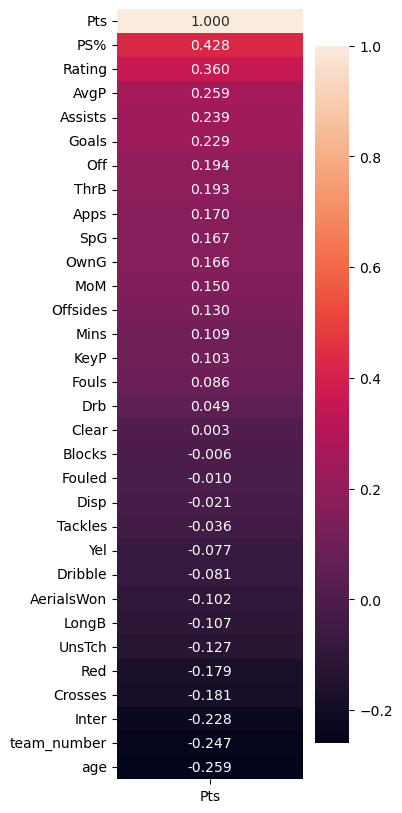

In [57]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

L1_M_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_M_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [58]:
# 상위 5개 변수 추출

L1_M_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['PS%', 'Rating', 'AvgP', 'Assists', 'Goals', 'Off', 'ThrB', 'SpG', 'OwnG', 'MoM']

['PS%',
 'Rating',
 'AvgP',
 'Assists',
 'Goals',
 'Off',
 'ThrB',
 'Apps',
 'SpG',
 'OwnG']

In [80]:
index_li = L1_M_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_M_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# PS%: 0.428 Rating: 0.360 AvgP: 0.259 Assists: 0.239 Goals: 0.229 Off: 0.194 ThrB: 0.193 Apps: 0.170 SpG: 0.167 OwnG: 0.166

PS%: 0.428
Rating: 0.360
AvgP: 0.259
Assists: 0.239
Goals: 0.229
Off: 0.194
ThrB: 0.193
Apps: 0.170
SpG: 0.167
OwnG: 0.166


# DM 포지션 데이터
## DM포지션에서 승리에 가장 큰 영향을 주는 변수 추출

In [59]:
L1_DM_player_df.head()

,player_name,team_number,Team,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,Branco van den Boomen,246,Toulouse,27,DM,35,2893,8,2.5,54.2,...,0.3,0.9,2.0,0.3,0.9,0.0,0.7,1.5,0.1,0
1,Maxence Caqueret,228,Lyon,23,DM,36,2778,7,1.7,46.5,...,1.3,1.9,2.4,1.1,1.3,0.0,0.8,1.8,0.1,0
2,Khéphren Thuram,613,Nice,22,DM,35,2560,4,1.0,37.7,...,1.0,0.9,1.5,1.1,0.9,0.0,0.9,0.7,0.4,0
3,Azor Matusiwa,950,Reims,25,DM,30,2492,0,0.8,53.3,...,0.4,0.8,2.2,1.5,1.4,0.0,1.6,0.8,0.4,0
4,Youssouf Fofana,248,Monaco,24,DM,36,3089,2,0.9,47.7,...,1.1,1.3,2.3,1.6,1.4,0.0,0.9,1.0,0.2,1


In [60]:
L1_DM_df = pd.merge(L1_DM_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [61]:
L1_DM_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [62]:
# 수치형 데이터만 뽑아온다.

L1_DM_numeric_df = L1_DM_df.select_dtypes(['int64', 'float64'])

In [63]:
L1_DM_corr_matrix = L1_DM_numeric_df.corr()
L1_DM_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.123637,0.268169,0.041541,-1.644575e-01,-0.120270,-0.122041,-7.167705e-03,-0.058803,-0.051868,...,-0.067673,-0.038816,0.054980,-0.297252,0.367249,-0.155855,0.095985,-0.093017,-0.129727,-0.142173
age,0.123637,1.000000,0.372864,0.483217,-5.058266e-02,0.132253,0.450051,-1.241586e-01,0.214249,0.426642,...,0.099546,0.381735,0.464686,-0.023640,0.043889,0.290205,0.551680,-0.069138,-0.089172,-0.438532
Apps,0.268169,0.372864,1.000000,0.853210,4.001110e-01,0.416408,0.395645,-4.933863e-02,0.311597,0.196888,...,0.461594,0.530366,0.553065,0.325337,0.143341,0.300024,0.495037,0.169391,0.225499,-0.346914
Mins,0.041541,0.483217,0.853210,1.000000,3.816115e-01,0.498328,0.758290,1.629227e-01,0.347000,0.488798,...,0.479174,0.606925,0.707878,0.387572,0.022862,0.462511,0.550285,0.312679,0.347835,-0.233745
Assists,-0.164458,-0.050583,0.400111,0.381612,1.000000e+00,0.824207,0.290520,1.611130e-15,0.757368,0.357240,...,0.311636,0.247020,-0.077049,-0.064982,0.036023,-0.003600,0.387413,-0.106698,-0.029290,-0.043833
KeyP,-0.120270,0.132253,0.416408,0.498328,8.242066e-01,1.000000,0.527220,7.258855e-03,0.848091,0.615218,...,0.334232,0.320350,-0.049440,0.005975,-0.073532,0.131728,0.370380,-0.111481,0.051581,-0.102547
AvgP,-0.122041,0.450051,0.395645,0.758290,2.905200e-01,0.527220,1.000000,4.083710e-01,0.345825,0.715286,...,0.403224,0.491810,0.459771,0.292356,-0.042666,0.390365,0.539395,0.270597,0.334914,0.088776
PS%,-0.007168,-0.124159,-0.049339,0.162923,1.611130e-15,0.007259,0.408371,1.000000e+00,-0.108129,-0.012181,...,0.029511,0.066740,0.200624,0.203614,-0.103602,0.269259,0.079569,0.396088,0.193975,0.331421
Crosses,-0.058803,0.214249,0.311597,0.347000,7.573679e-01,0.848091,0.345825,-1.081291e-01,1.000000,0.633055,...,0.159315,0.189457,-0.219864,-0.122633,-0.012844,-0.011370,0.388580,-0.192731,-0.083801,-0.104407
LongB,-0.051868,0.426642,0.196888,0.488798,3.572400e-01,0.615218,0.715286,-1.218108e-02,0.633055,1.000000,...,0.076798,0.294394,0.078450,-0.074971,0.057138,0.151387,0.469380,-0.059383,-0.041178,-0.147348


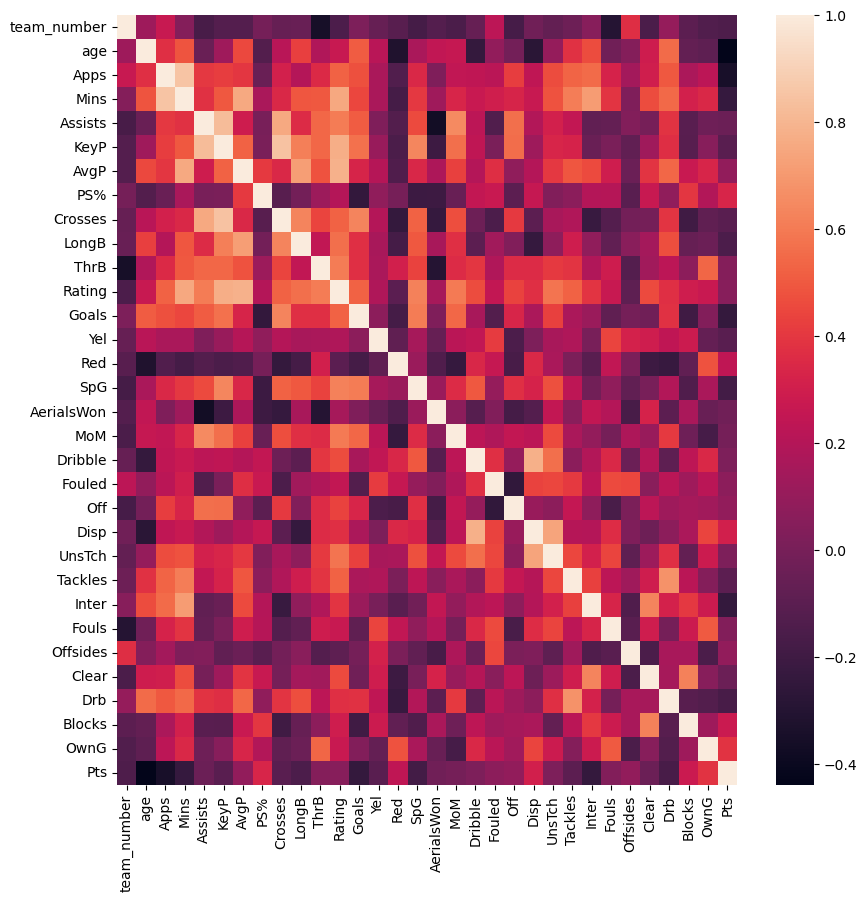

In [64]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_DM_corr_matrix)
plt.show()

In [65]:
# Pts부분만 뽑아서 상관관계 확인

L1_DM_corr_matrix_Pts = L1_DM_corr_matrix[['Pts']]
L1_DM_corr_matrix_Pts

,Pts
team_number,-0.142173
age,-0.438532
Apps,-0.346914
Mins,-0.233745
Assists,-0.043833
KeyP,-0.102547
AvgP,0.088776
PS%,0.331421
Crosses,-0.104407
LongB,-0.147348


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/454864161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_DM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


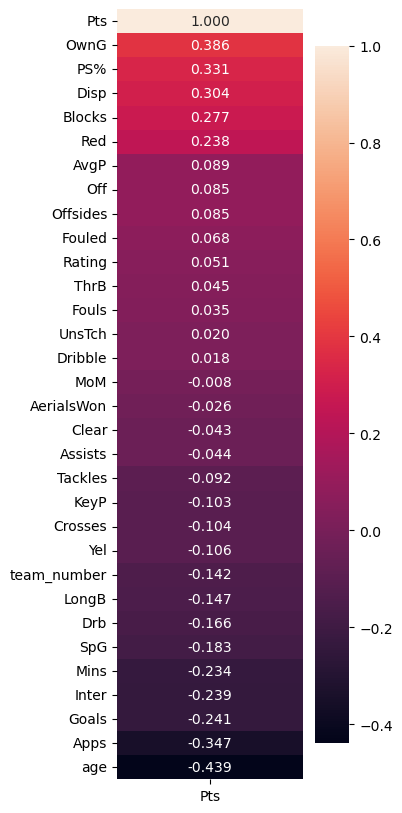

In [66]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

L1_DM_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_DM_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [67]:
# 상위 10개 변수 추출

L1_DM_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['OwnG', 'PS%', 'Disp', 'Blocks', 'Red', 'AvgP', 'Off', 'Offsides', 'Fouled', 'Rating']

['OwnG',
 'PS%',
 'Disp',
 'Blocks',
 'Red',
 'AvgP',
 'Off',
 'Offsides',
 'Fouled',
 'Rating']

In [81]:
index_li = L1_DM_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_DM_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# OwnG: 0.386 PS%: 0.331 Disp: 0.304 Blocks: 0.277 Red: 0.238 AvgP: 0.089 Off: 0.085 Offsides: 0.085 Fouled: 0.068 Rating: 0.051

OwnG: 0.386
PS%: 0.331
Disp: 0.304
Blocks: 0.277
Red: 0.238
AvgP: 0.089
Off: 0.085
Offsides: 0.085
Fouled: 0.068
Rating: 0.051


# D 포지션 데이터
## D포지션에서 승리에 가장 큰 영향을 주는 변수 추출

In [68]:
L1_D_player_df

,player_name,team_number,Team,age,position,Apps,Mins,Assists,KeyP,AvgP,...,Disp,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG
0,Benjamin André,607,Lille,32,D,34,2919,1,0.6,67.6,...,1.0,1.1,3.8,1.4,1.7,0.1,1.6,1.6,0.2,0
1,Andrei Girotto,302,Nantes,31,D,36,3153,1,0.4,48.1,...,0.2,0.3,3.4,2.0,1.5,0.3,4.8,1.6,0.7,0
2,Fabien Centonze,302,Nantes,27,D,23,1693,0,0.5,32.0,...,0.5,1.1,2.5,1.9,0.6,0.1,2.3,0.5,0.3,0
3,Nuno Mendes,304,Paris Saint-Germain,21,D,23,1554,5,1.0,35.9,...,0.7,1.3,2.0,0.7,1.1,0.1,0.7,0.5,0.1,0
4,Przemyslaw Frankowski,309,Lens,28,D,37,2838,3,1.8,36.1,...,0.4,0.8,2.1,1.1,0.9,0.1,0.9,1.1,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Sada Thioub,614,Angers,28,D,27,1056,2,0.6,16.9,...,0.7,0.6,0.7,0.3,0.5,0.0,0.1,0.3,0.0,0
119,Andreas Bruus,229,Troyes,24,D,27,1626,2,0.8,17.4,...,0.1,0.9,0.4,0.6,0.4,0.0,0.8,0.4,0.1,0
120,Sébastien Corchia,302,Nantes,32,D,22,775,1,0.2,12.2,...,0.3,0.6,0.7,0.6,0.7,0.0,0.7,0.5,0.1,0
121,Abdoulaye Bamba,614,Angers,33,D,21,1359,0,0.2,30.9,...,0.2,0.4,1.0,0.9,0.5,0.3,1.7,0.1,0.1,0


In [69]:
L1_D_df = pd.merge(L1_D_player_df, L1_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [70]:
L1_D_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB', 'Rating',
       'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM', 'Dribble', 'Fouled',
       'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter', 'Fouls', 'Offsides',
       'Clear', 'Drb', 'Blocks', 'OwnG', 'Pts'],
      dtype='object')

In [71]:
# 수치형 데이터만 뽑아온다.

L1_D_numeric_df = L1_D_df.select_dtypes(['int64', 'float64'])

In [72]:
L1_D_corr_matrix = L1_D_numeric_df.corr()
L1_D_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,-0.012865,0.040990,0.042155,-0.216232,-0.146960,-0.075677,-0.121739,-0.121623,0.104855,...,0.010323,0.052979,0.135278,0.115306,0.018935,-0.070574,0.058776,-0.061237,-0.008179,-0.104185
age,-0.012865,1.000000,0.105029,0.100555,-0.053199,-0.090889,0.132508,0.120630,-0.131170,0.279310,...,-0.185411,-0.010443,0.061616,-0.085869,-0.024700,0.220527,0.101327,0.116872,-0.001050,-0.057351
Apps,0.040990,0.105029,1.000000,0.852384,0.197849,0.022866,0.360409,0.105406,-0.090331,0.282641,...,0.028203,0.129245,0.225816,0.027114,0.073306,0.190969,-0.004132,0.173314,0.152758,0.221618
Mins,0.042155,0.100555,0.852384,1.000000,0.100696,-0.065989,0.620399,0.243665,-0.177077,0.512464,...,-0.033669,0.276340,0.440152,0.174511,0.334847,0.483771,0.045438,0.437041,0.217765,0.162973
Assists,-0.216232,-0.053199,0.197849,0.100696,1.000000,0.590330,-0.022287,-0.113394,0.352134,-0.160852,...,0.228392,0.106168,-0.243726,-0.053624,-0.285423,-0.247970,0.185250,-0.207028,-0.137282,0.331132
KeyP,-0.146960,-0.090889,0.022866,-0.065989,0.590330,1.000000,-0.148298,-0.250487,0.774123,-0.290444,...,0.489478,0.309531,-0.259916,-0.040426,-0.467806,-0.563710,0.483617,-0.518540,-0.182955,0.174831
AvgP,-0.075677,0.132508,0.360409,0.620399,-0.022287,-0.148298,1.000000,0.688121,-0.247112,0.685688,...,-0.314354,0.193925,0.363005,0.122046,0.443151,0.444079,0.046671,0.426595,0.204701,0.467823
PS%,-0.121739,0.120630,0.105406,0.243665,-0.113394,-0.250487,0.688121,1.000000,-0.355359,0.319044,...,-0.440518,-0.025789,0.121523,-0.064666,0.289821,0.254233,-0.193583,0.300301,0.142135,0.472830
Crosses,-0.121623,-0.131170,-0.090331,-0.177077,0.352134,0.774123,-0.247112,-0.355359,1.000000,-0.296879,...,0.341463,0.149077,-0.179913,-0.124673,-0.367720,-0.471306,0.352373,-0.462220,-0.111899,0.029055
LongB,0.104855,0.279310,0.282641,0.512464,-0.160852,-0.290444,0.685688,0.319044,-0.296879,1.000000,...,-0.393814,0.137998,0.443472,0.201998,0.469509,0.637998,0.142147,0.578231,0.220840,0.046014


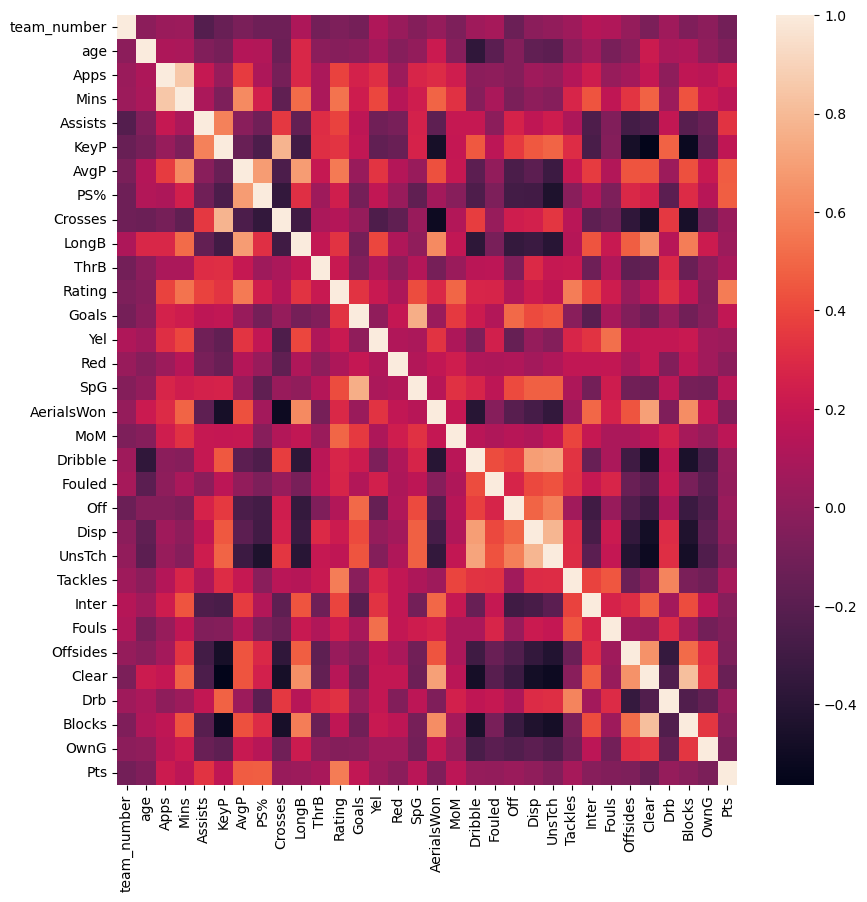

In [73]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(L1_D_corr_matrix)
plt.show()

In [74]:
# Pts부분만 뽑아서 상관관계 확인

L1_D_corr_matrix_Pts = L1_D_corr_matrix[['Pts']]
L1_D_corr_matrix_Pts

,Pts
team_number,-0.104185
age,-0.057351
Apps,0.221618
Mins,0.162973
Assists,0.331132
KeyP,0.174831
AvgP,0.467823
PS%,0.472830
Crosses,0.029055
LongB,0.046014


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_72451/4052533319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L1_D_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


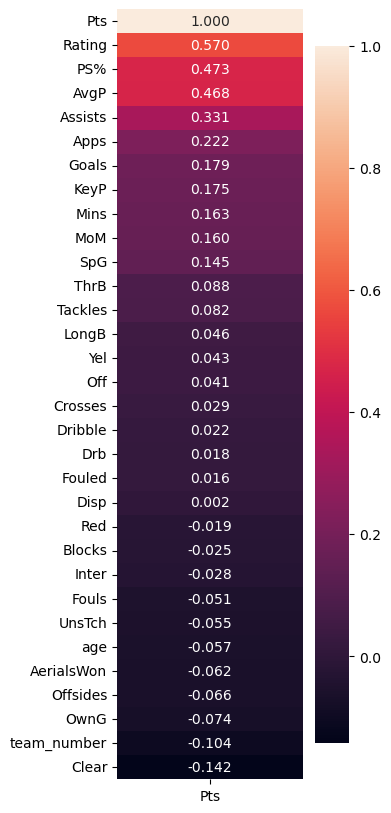

In [75]:
# 내림차순 정렬 후 heatmap으로 시각화
# 전체적으로 Pts와의 상관관계가 조금 낮은 상태..

L1_D_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(3, 10))
sns.heatmap(L1_D_corr_matrix_Pts, annot=True, fmt='.3f')
plt.show()

In [76]:
# 상위 10개 변수 추출

L1_D_corr_matrix_Pts.iloc[1:11].index.to_list()
# ['Rating', 'PS%', 'AvgP', 'Assists', 'Goals', 'KeyP', 'Mins', 'MoM', 'SpG', 'ThrB']

['Rating',
 'PS%',
 'AvgP',
 'Assists',
 'Apps',
 'Goals',
 'KeyP',
 'Mins',
 'MoM',
 'SpG']

In [82]:
index_li = L1_D_corr_matrix_Pts.iloc[:11].index.tolist()
corr_li = L1_D_corr_matrix_Pts['Pts'].tolist()
for i in range(1, 11):
    print(f'{index_li[i]}: {corr_li[i]:.3f}')
    
# Rating: 0.570 PS%: 0.473 AvgP: 0.468 Assists: 0.331 Apps: 0.222 Goals: 0.179 KeyP: 0.175 Mins: 0.163 MoM: 0.160 SpG: 0.145

Rating: 0.570
PS%: 0.473
AvgP: 0.468
Assists: 0.331
Apps: 0.222
Goals: 0.179
KeyP: 0.175
Mins: 0.163
MoM: 0.160
SpG: 0.145


# 결과 분서
## 전체적으로 상관계수가 매우 낮다
- 음... 뭔가 분석할 때 추가 작업이 필요할듯